<center><img alt="" src="images/Cover.jpg"/></center> 

## <center><font color="blue">VI. Support Vector Machines, Neural Network, Ensemble Learning, and dealing with Imbalance Data</font></center>

<h2 id="(C)-Taufik-Sutanto---2019" style="text-align: center;">(C) Taufik Sutanto - 2019</h2>
<h2 id="tau-data-Indonesia-~-https://tau-data.id" style="text-align: center;">tau-data Indonesia ~ <a href="https://tau-data.id" target="_blank"><span style="color: #0009ff;">https://tau-data.id</span></a></h2>

# Notes and Disclaimer

* This notebook is part of the free (open knowledge) eLearning course at: https://tau-data.id/courses/
* Some images are taken from several resources, we respect those images ownerships and put a reference/citation from where it is originated. Nevertheless, sometimes we are having trouble to find the origin of the image(s). If you are the owner of the image and would like the image taken-out (or want the citation to be revised) from this open knowledge course resources please contact us here with the details: https://tau-data.id/contact/  
* Unless stated otherwise, in general tau-data permit its resources to be copied and-or modified for non-commercial purposes. With condition proper acknowledgement/citation is given.

## Outline:

* Review Materi Sebelumnya
* Support Vector Machines
* Neural Network
* Ensemble Models
* Imbalance Data Problem

In [3]:
# Importing Modules untuk Notebook ini
#!pip install imblearn
#from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss # underSampling
from imblearn.over_sampling import SMOTE # OverSampling
from imblearn.combine import SMOTEENN # Combination of the 2
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
sns.set(style="ticks", color_codes=True)
from matplotlib.colors import ListedColormap
from sklearn import svm, preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from collections import Counter
import warnings; warnings.simplefilter('ignore')

## Review:
<img alt="" src="images/KDD.jpg" style="width: 650px; height: 376px;" />

## Association Rule: Rule, Support, Confidence, Lift by Example
<img alt="" src="images/Rule_Lift_Support_Confidence.png" style="width: 300px ; height: 181px" />
<img alt="" src="images/Rule_Lift_Support_Confidence_example.png" style="width: 300px; height: 222px;" />

## k-Nearest Neighbour
<img alt="" src="images/6_kNN.JPG" style="height:300px; width:711px" />

## Logistic Regression
<img alt="" src="images/reg_to_log.png" style="width: 650px; height: 328px;" />

## Teori Decision Tree : Information theory
<img alt="" src="images/dec_Tree_Theory.png" style="width: 600px; height: 337px;" />

## Naive Bayes Classifier

<img alt="" src="images/naive_bayes.png" style="width: 400px ; height: 220px" />
<ul>
	<li>P(x) konstan, sehingga bisa diabaikan.</li>
	<li>Asumsi terkuatnya adalah independensi antar variabel prediktor (sehingga dikatakan &quot;Naive&quot;)</li>
	<li>Klasifikasi dilakukan dengan menghitung probabilitas untuk setiap kategori ketika diberikan data x = (x1,x2,...,xm)</li>
	<li>Untuk data yang besar bisa menggunakan out-of-core approach (partial fit):<br />
	http://scikit-learn.org/stable/modules/scaling_strategies.html#scaling-strategies</li>
	<li>Variasi NBC adalah bagaimana P(c|x) dihitung, misal dengan distribusi Gaussian (Normal) - sering disebut sebagai Gaussian Naive Bayes (GNB):</li>
</ul>
<img alt="" src="images/Gaussian.png" style="width: 303px ; height: 50px" />

<img alt="" src="images/OverFitting.png" style="width: 400px; height: 427px;" />

<p><img alt="" src="images/sweet_spot.png" style="width: 400px; height: 236px;" /></p>


# Support Vector Machine (SVM)
Misal data dinyatakan sebagai berikut:
$\{(\bar{x}_1,y_1),...,(\bar{x}_n,y_n)\}$, dimana $\bar{x}_i$ adalah
input pattern untuk data ke $i^{th}$ dan $y_i$ adalah nilai target yang diinginkan. Kategori
(class) direpresentasikan dengan $y_i=\{-1,1\}$. Sebuah bidang datar (hyperplane) yang memisahkan kedua kelas ini ("linearly separable") adalah:
$$ \bar{w}'\bar{x}+b=0 $$
dimana $\bar{x}$ adalah input vector (prediktor), $\bar{w}$ weight, dan $b$ disebut sebagai bias.

## Pemodelan SVM (Hard Margin):

<img alt="" src="images/Pemodelan_SVM_.png" style="width: 250px ; height: 269px" />
* Misal **Xo** adalah sebuah vector di bidang (plane/garis) _wX + b = -1_
* Misal **r** adalah jarak antar SV-nya.
* karena **X** berada di bidang _wX+b=1_ maka  _X=Xo+rw/||w||_ 
* (lihat gambar *w* tegak lurus *X* (karena _wX+b=0_) dan _w/||w||_ adalah unit vektornya)
* Sehingga _wX+b=1_ dapat dituliskan sebagai _w(Xo+r w/||w||)-b = 1_
* atau _wXo+r||w||²/||w||-b=1_ ==> _wXo-b=1-r||w||_ ==> _-1=1-r||w||_
* sehingga di dapat $r = \frac{2}{||w||}$
* Kesimpulannya optimal hyperplane bisa didapatkan dengan memaksimumkan $\frac{2}{||w||}$ atau setara dengan $\min \frac{||w||}{2}$
* More details here: https://nlp.stanford.edu/IR-book/html/htmledition/support-vector-machines-the-linearly-separable-case-1.html

<img alt="" src="images/hard_margin_svm.png" style="width: 400px; height: 181px;" />
* Efek outlier pada pemodelan ini?

## Support Vector Machine: Soft Margin

<img alt="" src="images/6_SVM.jpg" style="height: 262px ; width: 232px" />
<img alt="" src="images/svm_opt.png" style="width: 300px; height: 106px;" />
* Apakah efek outlier masih sama pada pemodelan ini? Kaitannya dengan nilai C?

### C >>> ==> toleransi terhadap outlier <<<< dan sebaliknya

## Dual dan Quadratic solver
* optimasi di atas biasanya diselesaikan dengan mencari bentuk *Dual*-nya.
* Solusi untuk parameter optimalnya kemudian ditemukan dengan mencari pendekatan nilai optimalnya lewat Quadratic Programming solver.
* Perhatikan bahwa bentuk fungsi optimasinya konvex ==> memiliki minimum global.
* Nilai optimal dari pemodelan di atas hanya bergantung pada data-data di margin (support vector) sehingga bisa lebih efisien (jika SV telah diketahui).
* SV juga dapat digunakan untuk menganalisa "Error Bound" : http://www.svms.org/vc-dimension/

## Interpretation
* Recursive Feature Elimination (RFE) method : https://link.springer.com/content/pdf/10.1023/A:1012487302797.pdf 
* melihat bentuk kuadrat dari setiap komponen *w* (higher better).
* hati-hati beberapa diskusi di internet menyatakan bahwa sign (+/-) menyatakan tingkat kepentingan terhadap setiap variabel, namun hal ini tidak selalu benar dan bisa dibuktikan cukup dengan counter example. 

## Bagaimana dengan data kategorik?
* Sama dengan regresi (logistik) ==> Dummy (indicator variable) variable.
* Misal X1 = {a,b,c} ==> X1_a = [1,0,0], X1_b = [0,1,0], X1_c = [0,0,1]
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

In [4]:
# Contoh
df = pd.DataFrame({'X1': ['a', 'b', 'a','c','a'],'X2': [1, 2, 3, 2, 1]})
df = pd.get_dummies(df) # get_dummies(df, prefix=['dummy'])
df

,X2,X1_a,X1_b,X1_c
0,1,1,0,0
1,2,0,1,0
2,3,1,0,0
3,2,0,0,1
4,1,1,0,0


## Normalisasi/Standarisasi Data
* Sama seperti Regresi (logistik) prediktor/features di model SVM perlu untuk di standarisasi/normalisasi.
* http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range
* Hati-hati standarisasi data dilakukan setelah outlier ditangani dengan baik.

In [5]:
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True)
df['X2'] = scaler.fit_transform(df[['X2']])
df

,X2,X1_a,X1_b,X1_c
0,-1.069045,1,0,0
1,0.267261,0,1,0
2,1.603567,1,0,0
3,0.267261,0,0,1
4,-1.069045,1,0,0


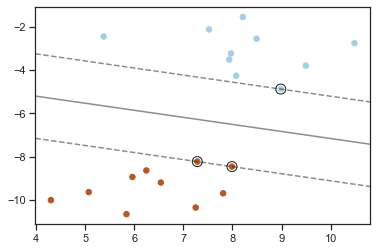

In [6]:
# Contoh plotting Optimal Hyperplane
# http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py

X, y = make_blobs(n_samples=20, centers=2, random_state=6) # we create 20 separable points
clf = svm.SVC(kernel='linear', C=1000) # fit the model, don't regularize for illustration purposes
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca();xlim = ax.get_xlim(); ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30);yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])# plot decision boundary and margins
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')# plot support vectors
plt.show()

<h3>SVM Kernel (trick)</h3>

<p><img alt="" src="images/6_SVM_Kernel.jpg" style="height:168px; width:306px" /></p>


## Definisi Fungsi Kernel
* Jika untuk semua $\bar{x},\bar{z} \in X$, memenuhi <br> 
$$\kappa (\bar{x},\bar{z})=<\phi (\bar{x}),\phi (\bar{z})>$$ maka $\kappa$ disebut fungsi Kernel (fungsi $\phi$ disebut *feature map*).
* Perhatikan hasil pemetaan fungsi kernelnya adalah scalar (inner product).
* Fungsi ini digunakan di SVM (dan model DM/ML lain yang bisa dinyatakan dalam inner product).
* Perhatikan pemodelan SVM; kebanyakan dinyatakan dalam inner product (i.e. w.x).
* See here for more details: https://nlp.stanford.edu/IR-book/html/htmledition/nonlinear-svms-1.html

<h3 id="Contoh-:-Lagrangian-Wolfe-Dual-dari-Optimasi-diatas">Contoh : Lagrangian Wolfe Dual dari Optimasi diatas</h3>

<p><img alt="" src="images/Lagrangian_Wolfe_Dual.png" style="width: 290px; height: 120px;" /></p>


## Contoh 1
* Misal $X\subseteq \Re^2$ dan $\phi : \bar{x}=(x_1,x_2)\rightarrow \phi (\bar{x})=(x_1^2,
x_2^2,\sqrt{2}x_1x_2)\in F=\Re^3$.
* maka <br>
$<\phi(\bar{x}),\phi(\bar{z})>$<br>
$=<(x_1^2,x_2^2,\sqrt{2}x_1x_2),(z_1^2,z_2^2,\sqrt{2}z_1z_2)>$<br>
$=x_1^2z_1^2+x_2^2z_2^2+2x_1x_2z_1z_2$<br>
$=(x_1z_1+x_2z_2)^2=<\bar{x},\bar{z}>^2$<br>
* Sehingga $\kappa(\bar{x},\bar{z})=<\bar{x},\bar{z}>^2$ adalah sebuah fungsi kernel dan $F$ adalah ruang feature-nya (feature space).

## Contoh 2
* Misal x = (x1, x2, x3); y = (y1, y2, y3). 
* dan fungsi pemetaan variabelnya f(x) = (x1², x1x2, x1x3, x2x1, x2², x2x3, x3x1, x3x2, x3²), 
* maka kernelnya adalah K(x, y ) = <f(x), f(y)> = <x, y>².
* Contoh numerik misal x = (1, 2, 3) dan y = (4, 5, 6). maka:
* f(x) = (1, 2, 3, 2, 4, 6, 3, 6, 9) <br> f(y) = (16, 20, 24, 20, 25, 30, 24, 30, 36)
* <f(x), f(y)> = 16 + 40 + 72 + 40 + 100+ 180 + 72 + 180 + 324 = 1024
* complicated!... Menggunakan fungsi kernel perhitungannya bisa disederhanakan:
* K(x, y) = (4 + 10 + 18)² = 32² = 1024

<h2 id="Well-Known-Kernel-Functions">Well-Known Kernel Functions</h2>

<p><img alt="" src="images/Well-Known_Kernels.png" style="width: 400px; height: 208px;" /></p>


<h3>SVM Binary to MultiClass</h3>

<p><img alt="" src="images/6_SVM_Ova.jpg" style="height:314px; width:432px" /></p>


<p><b>Pros</b></p>

<ul>
	<li>Akurasinya Baik</li>
	<li>Bekerja dengan baik untuk sampel data yang relatif kecil</li>
	<li>Hanya bergantung pada SV ==&gt; meningkatkan efisiensi</li>
	<li>Convex ==&gt; Minimum Global ==&gt; Pasti Konvergen</li>
</ul>

<p><b>Cons</b></p>

<ul>
	<li>Tidak efisien untuk data yang besar</li>
	<li>Akurasi terkadang rendah untuk multiklasifikasi (sulit mendapatkan hubungan antar kategori di modelnya)</li>
	<li>Tidak robust terhadap noise</li>
</ul>


In [7]:
# Contoh Binary SVM (dengan dan tanpa kernel)
# Loading Data
df = pd.read_excel('data/iris.xls', sheet_name='Sheet1')# Load Data from File
df = df.loc[0:99] # Use only First 100 data (becomes a Binary problem)
df['SPECIES'] = df['SPECIES'].astype('category')
df.describe(include='all')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,SPECIES,SEPALLEN,SEPALWID,PETALLEN,PETALWID
count,100.0,100.000000,100.000000,100.000000,100.000000
unique,2.0,NaN,NaN,NaN,NaN
top,2.0,NaN,NaN,NaN,NaN
freq,50.0,NaN,NaN,NaN,NaN
mean,NaN,5.471000,3.099000,2.861000,0.786000
std,NaN,0.641698,0.478739,1.449549,0.565153
min,NaN,4.300000,2.000000,1.000000,0.100000
25%,NaN,5.000000,2.800000,1.500000,0.200000
50%,NaN,5.400000,3.050000,2.450000,0.800000
75%,NaN,5.900000,3.400000,4.325000,1.300000


In [8]:
# Separate the data
X = df[['SEPALLEN','SEPALWID','PETALLEN','PETALWID']]
Y = df['SPECIES']
X = preprocessing.StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
print(X_train.shape, X_test.shape)

(70, 4) (30, 4)


In [9]:
# Fitting and evaluate the model
dSVM = svm.SVC(C = 10**5, kernel = 'linear')
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
print(confusion_matrix(Y_test, y_SVM))
print(classification_report(Y_test, y_SVM))

Akurasi =  1.0
[[16  0]
 [ 0 14]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
# The Support Vectors
print('index dr SV-nya: ', dSVM.support_)
print('Vector Datanya: \n', dSVM.support_vectors_)

index dr SV-nya:  [41 21 44]
Vector Datanya: 
 [[-0.73768744 -0.2078351  -0.87430856 -1.04211089]
 [ 0.35866332 -1.0475729   0.44304772  0.38056609]
 [-0.89430898 -1.4674418   0.30437864  0.38056609]]


In [11]:
# Model Weights for interpretations
print('w = ',dSVM.coef_)
print('b = ',dSVM.intercept_)

w =  [[ 0.09953016 -0.4649537   0.50473824  0.58728775]]
b =  [0.02993119]


In [ ]:
# Menggunakan Kernel: http://scikit-learn.org/stable/modules/svm.html#svm-kernels
for kernel in ('sigmoid', 'poly', 'rbf'):
    dSVM = svm.SVC(kernel=kernel)
    dSVM.fit(X_train, Y_train)
    y_SVM = dSVM.predict(X_test)
    print(accuracy_score(Y_test, y_SVM))

In [12]:
# Contoh Multiklasifikasi SVM (dengan dan tanpa kernel)
df = pd.read_excel('data/iris.xls', sheet_name='Sheet1')# Load Data from File
df['SPECIES'] = df['SPECIES'].astype('category')
X = df[['SEPALLEN','SEPALWID','PETALLEN','PETALWID']]
Y = df['SPECIES']
X = preprocessing.StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
print(X_train.shape, X_test.shape)
df.describe(include='all')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(105, 4) (45, 4)


,SPECIES,SEPALLEN,SEPALWID,PETALLEN,PETALWID
count,150.0,150.000000,150.000000,150.000000,150.000000
unique,3.0,NaN,NaN,NaN,NaN
top,3.0,NaN,NaN,NaN,NaN
freq,50.0,NaN,NaN,NaN,NaN
mean,NaN,5.843333,3.057333,3.758000,1.199333
std,NaN,0.828066,0.435866,1.765298,0.762238
min,NaN,4.300000,2.000000,1.000000,0.100000
25%,NaN,5.100000,2.800000,1.600000,0.300000
50%,NaN,5.800000,3.000000,4.350000,1.300000
75%,NaN,6.400000,3.300000,5.100000,1.800000


In [13]:
# One Versus All: http://www.jmlr.org/papers/volume5/rifkin04a/rifkin04a.pdf
dSVM = svm.LinearSVC()
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
y_SVM

Akurasi =  0.9555555555555556


array([2, 2, 2, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 1,
       2, 3, 2, 3, 2, 2, 2, 2, 1, 2, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1], dtype=int64)

In [14]:
# Ada 3 classifier (as expected)
dSVM.coef_

array([[-0.06773622,  0.46487447, -0.55596866, -0.62240461],
       [-0.02245233, -0.54139108,  0.30711569, -0.34524399],
       [-0.30497942, -0.22249621,  1.58706468,  1.54303429]])

In [15]:
# All At Once Method http://www.jmlr.org/papers/volume2/crammer01a/crammer01a.pdf
dSVM = svm.SVC(decision_function_shape='ovo')
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_SVM))
y_SVM

Akurasi =  0.9777777777777777


array([2, 2, 2, 2, 1, 1, 3, 1, 3, 1, 3, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 1,
       2, 3, 2, 3, 2, 2, 2, 2, 1, 2, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1], dtype=int64)

<h1 id="Artificial-Neural-Network---Jaringan-Syaraf-tiruan">Artificial Neural Network - Jaringan Syaraf Tiruan</h1>

<p><img alt="" src="images/JST.jpg" style="width: 600px; height: 362px;" /></p>


<img alt="" src="images/6_JST.JPG" style="height:400px; width:706px" />

<p><img alt="" src="images/6_JST_calculation.JPG" style="height:350px; width:638px" /></p>


<img alt="" src="images/6_JST_Actv.png" style="height:400px; width:484px" />

<h2 id="Toy-Data-Example-Neural-Network-(Back-Propagation)">Toy Data Example Neural Network (Back Propagation)</h2>

<p><img alt="" src="images/NN-BP_step_1.png" style="width: 600px; height: 358px;" /></p>


<img alt="" src="images/NN-BP_step_2.png" style="width: 600px; height: 348px;" />

<p><img alt="" src="images/NN-BP_step_3.png" style="width: 600px; height: 313px;" /></p>


<p><img alt="" src="images/NN-BP_step_4.png" style="width: 600px; height: 305px;" /></p>


<p><img alt="" src="images/NN-BP_step_5.png" style="width: 600px; height: 305px;" /></p>


<img alt="" src="images/NN-BP_step_6.png" style="width: 600px; height: 304px;" />

<p><img alt="" src="images/NN-BP_step_7.png" style="width: 600px; height: 305px;" /></p>


<p><img alt="" src="images/NN-BP_step_8.png" style="width: 600px; height: 303px;" /></p>


<p><img alt="" src="images/NN-BP_step_9.png" style="width: 600px; height: 301px;" /></p>


## Multiclass ANN
<img alt="" src="images/Multiclass_ANN.png" style="width: 600px; height: 468px;" />

### Melihat pemodelan Matematis dan cara kerja Neural Network, apakah kita perlu melakukan standarisasi data juga seperti SVM dan Regresi Logistic?

<p>Neural Network - Empirical Analysis Parameter di ANN</p>
<strong><a href="https://goo.gl/3rcnc9" target="_blank">https://goo.gl/3rcnc9</a></strong>


<p>Mengapa dengan fungsi linear bisa membentuk &quot;boundary&quot; yang melengkung (kurva)?</p>
<strong><a href="http://s.id/j6i" target="_blank">http://s.id/j6i</a></strong>

<p><img alt="" src="images/6_tipe_NN.png" style="height:400px; width:711px" /></p>


### Neural Network VS Deep Learning
<img alt="" src="images/5_DeepLearning.png" style="width: 600px; height: 676px;" />

<p><img alt="" src="images/6_NN_when_to_use.JPG" style="height:400px; width:499px" /></p>

In [16]:
# Neural Network: http://scikit-learn.org/stable/modules/neural_networks_supervised.html
NN = MLPClassifier(hidden_layer_sizes=(100,))# 2 layers 30 neurons and 20 neurons
NN.fit(X_train, Y_train)
y_NN = NN.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_NN))

Akurasi =  0.9555555555555556


## Induktif bias :
<ul>
	<li>Bias penaksiran parameter (statistik)</li>
	<li>Induktif Bias Sample (Machine Learning - Tom Mitchel)</li>
	<li>Induktif Bias Pemilihan Classifier (Statistical Learning Theory - Vapnik)</li>
</ul>
<img alt="" src="images/inductive_biases_.png" style="width: 600px; height: 153px;" />

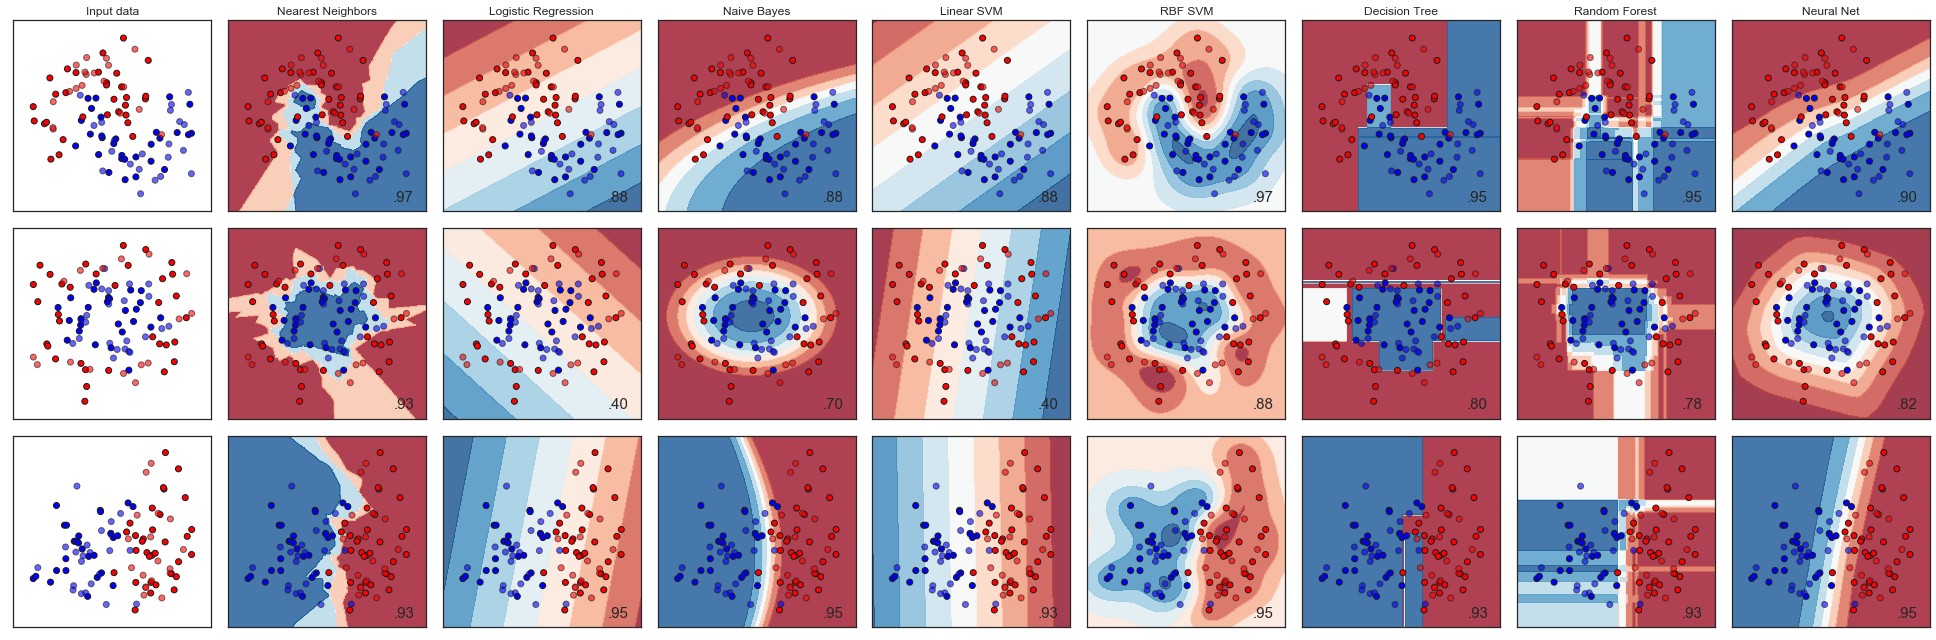

In [17]:
h, i = .02, 1  # step size in the mesh , iterate over datasets
names = ["Nearest Neighbors", "Logistic Regression", "Naive Bayes", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net"]

classifiers = [KNeighborsClassifier(3),
    LogisticRegression(solver='lbfgs',multi_class='multinomial'),
    GaussianNB(), SVC(kernel="linear", C=0.025), SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),make_circles(noise=0.2, factor=0.5, random_state=1),linearly_separable]
figure = plt.figure(figsize=(27, 9))

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = preprocessing.StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max()); ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(()); ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max());ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(()); ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout();plt.show()

<h2 id="Ensemble-Model">Ensemble Model</h2>

<ul>
	<li>What? a learning algorithms that construct a set of classifiers and then classify new data points by taking a (weighted) vote of their predictions.</li>
	<li>Why? Better prediction, More stable model</li>
	<li>How? Bagging &amp; Boosting</li>
</ul>
<img alt="" src="images/Ensemble.png" style="width: 500px; height: 213px;" />

## “meta-algorithms” : Bagging & Boosting
* Ensemble https://www.youtube.com/watch?v=Un9zObFjBH0 
* Bagging https://www.youtube.com/watch?v=2Mg8QD0F1dQ 
* Boosting https://www.youtube.com/watch?v=GM3CDQfQ4sw

<p><img alt="" src="images/Bagging_VS_Boosting.png" style="width: 500px; height: 185px;" /></p>


<img alt="" src="images/Bagging-Boosting_Usage.png" style="width: 500px; height: 281px;" />

<h2 id="Ada-Boost">AdaBoost</h2>
<ul>
	<li><a href="https://youtu.be/BoGNyWW9-mE?t=70" target="_blank">https://youtu.be/BoGNyWW9-mE?t=70</a></li>
</ul>
<img alt="" src="images/AdaBoost.png" style="width: 400px; height: 332px;" />

In [ ]:
# Contoh Voting (Bagging) di Python
# Catatan : Random Forest termasuk Bagging Ensemble (walau modified)
file = 'data/diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(file, names=names).values # Rubah ke numpy array
X, Y = data[:,0:8], data[:,8] # Slice
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

kNN = KNeighborsClassifier(3)
kNN.fit(X_train, Y_train)
Y_kNN = kNN.score(X_test, Y_test)

DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, Y_train)
Y_DT = DT.score(X_test, Y_test)

model = VotingClassifier(estimators=[('k-NN', kNN), ('Decision Tree', DT)], voting='hard')
model.fit(X_train,Y_train)
Y_Vot = model.score(X_test,Y_test)

print('Akurasi k-NN', Y_kNN)
print('Akurasi Decision Tree', Y_DT)
print('Akurasi Votting', Y_Vot)

In [ ]:
# Averaging juga bisa digunakan di Klasifikasi (ndak hanya Regresi), 
# tapi kita pakai probabilitas dari setiap kategori
T = DecisionTreeClassifier()
K = KNeighborsClassifier()
R= LogisticRegression()

T.fit(X_train,Y_train)
K.fit(X_train,Y_train)
R.fit(X_train,Y_train)

y_T=T.predict_proba(X_test)
y_K=K.predict_proba(X_test)
y_R=R.predict_proba(X_test)

Ave = (y_T+y_K+y_R)/3
print(Ave[:5]) # Print just first 5
prediction = [v.index(max(v)) for v in Ave.tolist()]
print(prediction[:5]) # Print just first 5
print('Akurasi Averaging', accuracy_score(Y_test, prediction))

In [ ]:
# AdaBoost
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=9)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=1)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

<h2 id="Imbalance-Data">Imbalance Data</h2>
* Metric Trap
* Akurasi kategori tertentu lebih penting
* Contoh kasus
<img alt="" src="images/imbalance.png" />

<ul>
	<li>Undersampling</li>
	<li>Oversampling</li>
	<li>Model Based (weight adjustment)</li>
</ul>
<img alt="" src="images/under-over-sampling.png" style="width: 500px; height: 147px;" />
* https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
* Plot perbandingan: https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/combine/plot_comparison_combine.html#sphx-glr-auto-examples-combine-plot-comparison-combine-py

In [ ]:
# Contoh undersampling
# jalankan perintah ini di terminal/command prompt: 
# "pip install imblearn" (Jupyter harus ditutup terlebih dahulu)
#from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss # underSampling
from imblearn.over_sampling import SMOTE # OverSampling
from imblearn.combine import SMOTEENN # Combination of the 2
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

file = 'data/diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(file, names=names).values # Rubah ke numpy array
X, Y = data[:,0:8], data[:,8].astype(int) # Slice
X = preprocessing.StandardScaler().fit_transform(X)
X, Y = make_imbalance(X, Y, sampling_strategy={0: 500, 1: 50},random_state=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

print('Training target statistics: {}'.format(Counter(Y_train)))
print('Testing target statistics: {}'.format(Counter(Y_test)))

dSVM = svm.LinearSVC()
dSVM.fit(X_train, Y_train)
y_SVM = dSVM.predict(X_test); del dSVM
print('Original Results:',classification_report(Y_test, y_SVM))

nm = NearMiss(random_state=1)
X_res, Y_res = nm.fit_resample(X_train, Y_train)
dSVM = svm.LinearSVC()
dSVM.fit(X_res, Y_res)
y_SVM = dSVM.predict(X_test); del dSVM
print('UnderSampling Results:\n',classification_report_imbalanced(Y_test, y_SVM))

sm = SMOTE(random_state=1)
X_res, Y_res = sm.fit_resample(X_train, Y_train)
dSVM = svm.LinearSVC()
dSVM.fit(X_res, Y_res)
y_SVM = dSVM.predict(X_test); del dSVM
print('OverSampling Results:\n',classification_report_imbalanced(Y_test, y_SVM))


smo = SMOTEENN(random_state=1)
X_res, Y_res = smo.fit_resample(X_train, Y_train)
dSVM = svm.LinearSVC()
dSVM.fit(X_res, Y_res)
y_SVM = dSVM.predict(X_test)
print('Combination Results:\n',classification_report_imbalanced(Y_test, y_SVM))

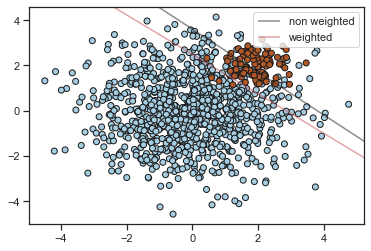

In [18]:
# Example of model-based imbalance treatment - SVM
n_samples_1, n_samples_2 = 1000, 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],centers=centers,cluster_std=clusters_std,random_state=0, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10}) #WEIGHTED SVM
wclf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')# plot the samples
ax = plt.gca()# plot the decision functions for both classifiers
xlim = ax.get_xlim(); ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)# create grid to evaluate model
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)# get the separating hyperplane
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-']) # plot decision boundary and margins
Z = wclf.decision_function(xy).reshape(XX.shape)# get the separating hyperplane for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])# plot decision boundary and margins for weighted classes
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"], loc="upper right")
plt.show()

## Weighted Decision Tree

In [19]:
file = 'data/diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(file, names=names).values # Rubah ke numpy array
X, Y = data[:,0:8], data[:,8].astype(int) # Slice
X = preprocessing.StandardScaler().fit_transform(X)
X, Y = make_imbalance(X, Y, sampling_strategy={0: 500, 1: 50},random_state=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

del T
T = DecisionTreeClassifier(random_state = 0)
T.fit(X_train,Y_train)
y_DT = T.predict(X_test)
print('Akurasi  (Decision tree Biasa) = ', accuracy_score(Y_test, y_DT))
print(classification_report(Y_test, y_DT))

del T
T = DecisionTreeClassifier(class_weight = 'balanced', random_state = 0)
T.fit(X_train,Y_train)
y_DT = T.predict(X_test)
print('Akurasi  (Weighted Decision tree) = ', accuracy_score(Y_test, y_DT))
print(classification_report(Y_test, y_DT))

NameError: name 'make_imbalance' is not defined

<h1 id="EoM">End of Module<br />
<hr />
